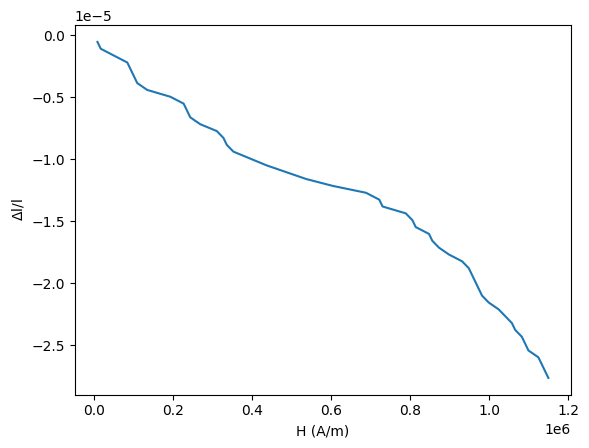

In [34]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
df = pd.read_excel('Ni new.xlsx')
data = df.to_numpy()

# Create a random numpy array
x_min = 0
x_max = 2
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 0]
x_min_values = data[min_indices, 0]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)

# n values
ap_values = np.arange(0.5, np.ceil(len(current_values)/2)+0.5, 0.5)

# delta_l values
delta_l = -ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI

# Plotting
plt.plot(H_values, delta_l_l, '-')
plt.xlabel('H (A/m)')
plt.ylabel('$\Delta$l/l')
plt.show()
